In [74]:
import sys
import os
from typing import Tuple
import pandas

sys.path.append('/home/danillorp/Área de Trabalho/github/fema/src/')


import fema_semi
import fema_classifier
import fema_regression
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [75]:
def generate_random_points_2d(n_points):
    """
    Generate N random points in 2D space.
    
    Parameters:
    n_points (int): Number of random points to generate.
    
    Returns:
    numpy.ndarray: Array of shape (n_points, 2) containing random 2D points.
    """
    # Generate random x and y coordinates in the range [0, 100)
    x_coords = np.random.rand(n_points) * 100
    y_coords = np.random.rand(n_points) * 100
    
    # Combine x and y coordinates into a single array
    points = np.column_stack((x_coords, y_coords))
    
    return points

    

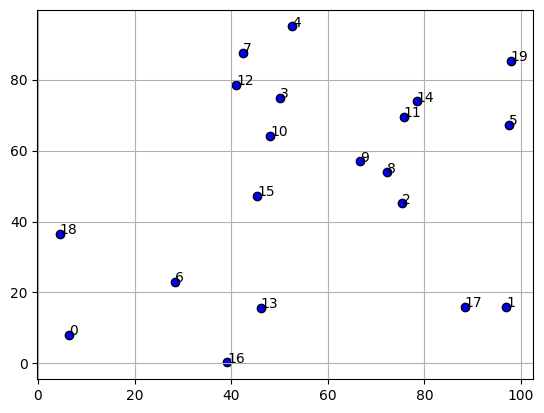

In [76]:
# Number of random points to generate
N = 20

# Generate random 2D points
points = generate_random_points_2d(N)

fig, ax = plt.subplots()

# Plot the generated points
ax.scatter(points[:, 0], points[:, 1], c='blue', marker='o', edgecolors='black')
#ax.title(f'{N} Random 2D Points')
#ax.xlabel('X Coordinate')
#ax.ylabel('Y Coordinate')
ax.grid(True)

for i, txt in enumerate(range(N)):
    ax.annotate(txt, (points[i,0], points[i,1]))

plt.show()

In [77]:
points_list = points.tolist()
points_list_aux = points_list.copy()

dist_matrix = np.zeros((N, N))
weigth_matrix = np.zeros((N, N))


z = 2

for (p,ind) in zip(points_list,range(0,len(points_list))):
    dist = np.array(
            [np.linalg.norm(points[i]-p) for i in range(len(points))]
            )
    dist_matrix[ind,:] = dist
    dist_matrix[ind,ind] = 10**20

    weigth_matrix[ind,:] = 1.0/(dist_matrix[ind,:]**z)
    weigth_matrix[ind,:] = weigth_matrix[ind,:]/sum(weigth_matrix[ind,:]+1**-20)


    
print(dist_matrix)
print('\n')
print(weigth_matrix)
      
        

[[1.00000000e+20 9.09070993e+01 7.83685423e+01 7.97607093e+01
  9.84669925e+01 1.08719352e+02 2.66273193e+01 8.71990464e+01
  8.03123372e+01 7.76899028e+01 6.98838999e+01 9.26147151e+01
  7.85894911e+01 4.04839241e+01 9.75649697e+01 5.53606538e+01
  3.37602032e+01 8.23775002e+01 2.84595227e+01 1.19745657e+02]
 [9.09070993e+01 1.00000000e+20 3.62809227e+01 7.52307027e+01
  9.05925965e+01 5.13501429e+01 6.89014078e+01 8.98942308e+01
  4.51737212e+01 5.08935202e+01 6.86129267e+01 5.75668356e+01
  8.39464353e+01 5.07883520e+01 6.08668887e+01 6.02840433e+01
  5.98245832e+01 8.56380737e+00 9.46385482e+01 6.93654280e+01]
 [7.83685423e+01 3.62809227e+01 1.00000000e+20 3.89987568e+01
  5.47777248e+01 3.13062880e+01 5.19571019e+01 5.36210227e+01
  9.21697051e+00 1.46126255e+01 3.32658440e+01 2.43093802e+01
  4.79423000e+01 4.15907686e+01 2.89117971e+01 3.00456579e+01
  5.76858768e+01 3.19655471e+01 7.13907401e+01 4.60118340e+01]
 [7.97607093e+01 7.52307027e+01 3.89987568e+01 1.00000000e+20
  2.0

In [78]:
conquest = np.zeros(N)
conquested = np.zeros(N)
splited = np.zeros(N)

for i in range(len(points)):
   if i == 36:
      print(np.argsort(weigth_matrix[i,:])[N-1])
   conquest[i] = np.argsort(weigth_matrix[i,:])[N-1]
   splited[i]  = np.argsort(weigth_matrix[i,:])[1]

print(conquest)
print(splited)

for i in range(len(points)):
   if (i == int(conquest[int(conquest[i])])) & (i != int(splited[int(conquest[i])])):
      if i <= int(conquest[i]):
         conquested[i] = i
         conquested[int(conquest[i])] = i
         print(i,int(conquest[i]),int(conquest[int(conquest[i])]))
      else:
         print('passou',i,int(conquest[i]),int(conquest[int(conquest[i])]))
         #conquested[i] = i
   else:
      print('NAO ',i,int(conquest[i]),int(conquest[int(conquest[i])]))
      conquested[i] = i

print(conquest)
print(conquested)


[ 6. 17.  8. 12.  7. 19. 13. 12.  9.  8.  3. 14.  7. 16. 11. 10. 13.  1.
  6.  5.]
[19. 18.  0.  0.  0.  0. 19.  1.  0.  0.  0.  0.  1. 19.  0. 19. 19.  4.
 19.  0.]
NAO  0 6 13
1 17 1
NAO  2 8 9
NAO  3 12 7
NAO  4 7 12
5 19 5
NAO  6 13 16
7 12 7
8 9 8
passou 9 8 9
NAO  10 3 12
11 14 11
passou 12 7 12
13 16 13
passou 14 11 14
NAO  15 10 3
passou 16 13 16
passou 17 1 17
NAO  18 6 13
passou 19 5 19
[ 6. 17.  8. 12.  7. 19. 13. 12.  9.  8.  3. 14.  7. 16. 11. 10. 13.  1.
  6.  5.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  8. 10. 11.  7. 13. 11. 15. 13.  1.
 18.  5.]


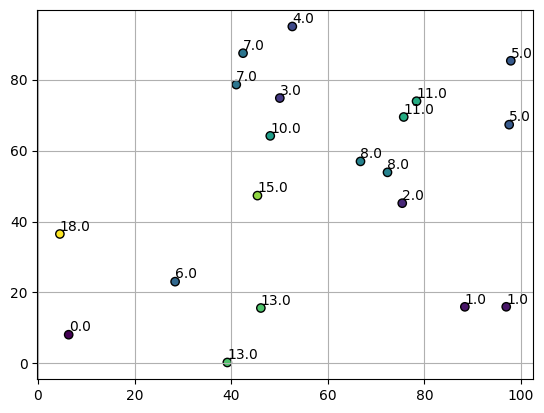

In [79]:
fig, ax = plt.subplots()

# Plot the generated points
ax.scatter(points[:, 0], points[:, 1], c=conquested, marker='o', edgecolors='black')
#ax.title(f'{N} Random 2D Points')
#ax.xlabel('X Coordinate')
#ax.ylabel('Y Coordinate')
ax.grid(True)

for i in range(len(conquested)):
    ax.annotate(conquested[i], (points[i,0], points[i,1]+1))

plt.show()

In [80]:
nivel_1 = np.zeros(len(set(conquested)))

for i,j in enumerate(set(conquested)):
    print(i,j)
    print(np.where(conquested == j)[0].tolist())
    print(weigth_matrix[np.where(conquested == j)[0].tolist(),0])


0 0.0
[0]
[4.99841418e-42]
1 1.0
[1, 17]
[6.04464597e-06 7.36084149e-06]
2 2.0
[2]
[8.12979496e-06]
3 3.0
[3]
[7.84540592e-06]
4 4.0
[4]
[5.15237895e-06]
5 5.0
[5, 19]
[4.22713347e-06 3.48506405e-06]
6 6.0
[6]
[7.04783945e-05]
7 7.0
[7, 12]
[6.56582912e-06 8.08099421e-06]
8 8.0
[8, 9]
[7.73165101e-06 8.26426069e-06]
9 10.0
[10]
[1.02233897e-05]
10 11.0
[11, 14]
[5.81241368e-06 5.23857243e-06]
11 13.0
[13, 16]
[3.04877546e-05 4.38481326e-05]
12 15.0
[15]
[1.63004718e-05]
13 18.0
[18]
[6.17117362e-05]


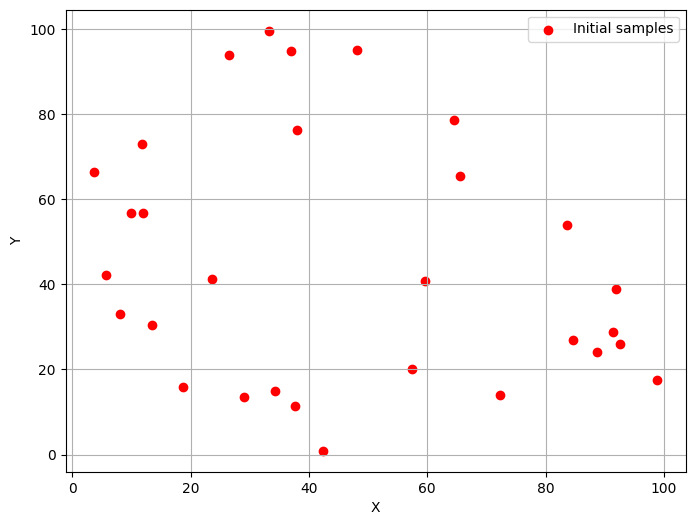

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Função para gerar pontos aleatórios
def generate_random_points(min_x, max_x, min_y, max_y, num_points):
    return np.random.uniform(min_x, max_x, num_points), np.random.uniform(min_y, max_y, num_points)

# Função para filtrar pontos próximos aos pontos de NP
def filter_nearby_points(random_x, random_y, np_x, np_y, min_distance):
    filtered_x, filtered_y = [], []
    
    for x, y in zip(random_x, random_y):
        # Verifica a distância mínima entre o ponto aleatório e os pontos de NP
        distances = np.sqrt((np_x - x)**2 + (np_y - y)**2)
        
        if np.all(distances >= min_distance):
            filtered_x.append(x)
            filtered_y.append(y)
    
    return filtered_x, filtered_y


def lists_to_np_array(list1, list2):
    # Convertendo as listas para arrays NumPy
    array1 = np.array(list1)
    array2 = np.array(list2)
    
    # Unindo os arrays em um array 2D
    coordinates = np.column_stack((array1, array2))
    
    return coordinates


N = 30
points = generate_random_points_2d(N)

# Nuvem de pontos inicial (NP)
np_x = points[:,0]
np_y = points[:,1]

# Coordenadas mínimas e máximas
min_x, max_x = np.min(np_x) - 1, np.max(np_x) + 1
min_y, max_y = np.min(np_y) - 1, np.max(np_y) + 1

# Número de pontos aleatórios
num_points = 2*N

# Distância mínima dos pontos gerados em relação aos pontos de NP
min_distance = 7.0

# Gerar pontos aleatórios
random_x, random_y = generate_random_points(min_x, max_x, min_y, max_y, num_points)

# Filtrar pontos próximos aos pontos de NP
filtered_x, filtered_y = filter_nearby_points(random_x, random_y, np_x, np_y, min_distance)

# Plotar pontos
plt.figure(figsize=(8, 6))
plt.scatter(np_x, np_y, color='red', label='Initial samples')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


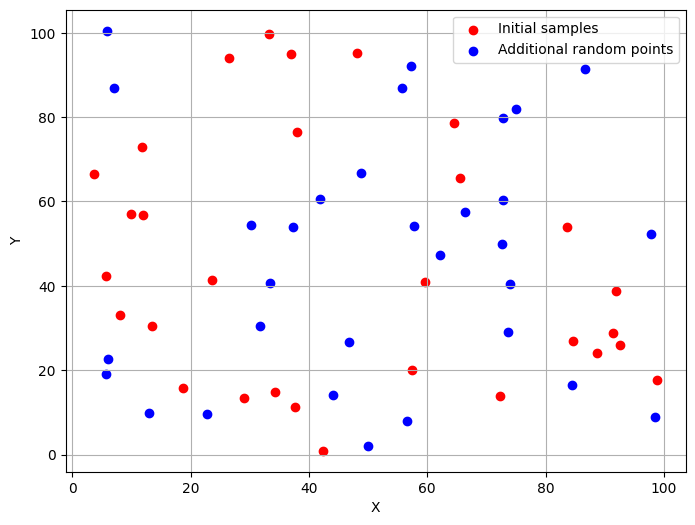

In [82]:
# Plotar pontos
plt.figure(figsize=(8, 6))
plt.scatter(np_x, np_y, color='red', label='Initial samples')
plt.scatter(filtered_x, filtered_y, color='blue', label='Additional random points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


In [119]:
samples = points.copy()
non_samples = lists_to_np_array(filtered_x, filtered_y)

print(samples.shape,non_samples.shape,len(filtered_y))

joined_samples = np.concatenate((samples, non_samples))

print(joined_samples.shape)

labels = np.zeros(joined_samples.shape[0],dtype=int)
labels[:samples.shape[0]] = 1
labels[samples.shape[0]:] = 0
print(labels)
print(labels.shape)




(30, 2) (31, 2) 31
(61, 2)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(61,)


Primeiros 10 pontos:
[[57.33419867 20.02056756]
 [88.59276791 24.05444344]
 [23.58279424 41.31793368]
 [18.79091598 15.88060106]
 [42.3420297   0.89677738]
 [11.86610605 72.92082963]
 [13.45611672 30.50581914]
 [ 8.11059733 33.13447631]
 [91.81422736 38.83518273]
 [26.47701395 93.96774393]]


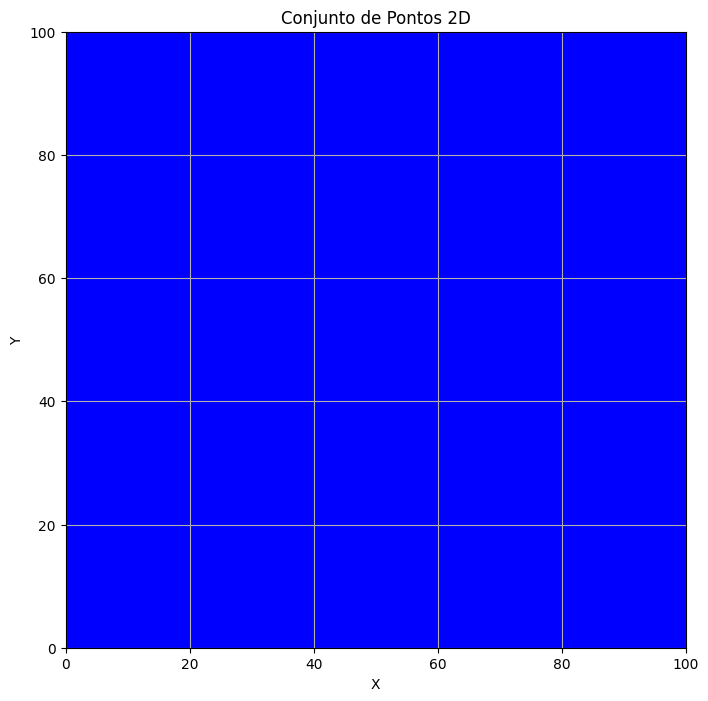

In [158]:
# Definindo os limites do espaço
x_min, x_max = 0, 100
y_min, y_max = 0, 100

# Definindo o passo
step = 1

# Gerando os pontos usando np.meshgrid
x_values = np.arange(x_min, x_max + step, step)
y_values = np.arange(y_min, y_max + step, step)

xx, yy = np.meshgrid(x_values, y_values)

# Convertendo os pontos gerados em um único conjunto de pontos 2D
test = np.column_stack((xx.ravel(), yy.ravel()))

print("Primeiros 10 pontos:")
print(points[:10])

# Plotando os pontos (opcional)
plt.figure(figsize=(8, 8))
plt.scatter(test[:, 0], test[:, 1],  c='blue')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Conjunto de Pontos 2D')
plt.grid(True)
plt.show()

In [159]:
model = fema_classifier.FEMaClassifier(k=10,basis=fema_regression.Basis.shepardBasis)
model.fit(joined_samples,labels.reshape((len(labels),1)))



pred, prob = model.predict(test,3)


In [160]:
model.probability_classes

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

101


(array([5653.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4548.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

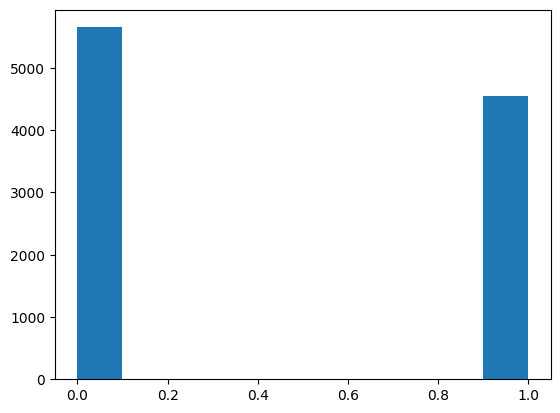

In [161]:
np.unique(pred)
print(len(xx))
plt.hist(pred)

(array([5653.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4548.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

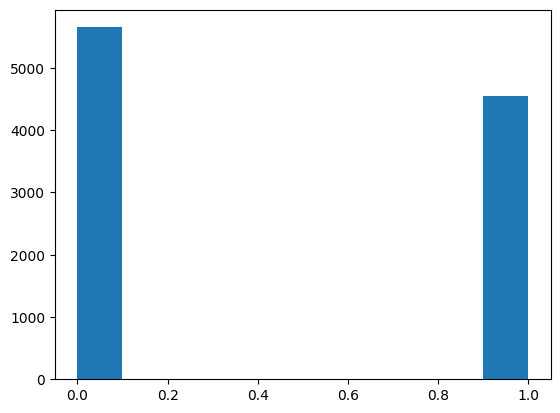

In [162]:
pred_img = np.array(pred).reshape((xx.shape[0],yy.shape[0]))
pred_img = pred_img


plt.hist(pred_img.ravel())

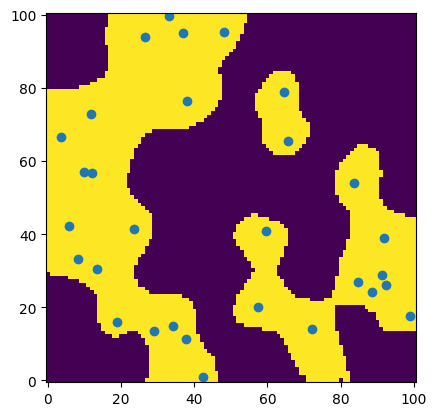

In [163]:

plt.imshow(pred_img)
plt.scatter(points[:,0],points[:,1])
plt.gca().invert_yaxis()

plt.show()

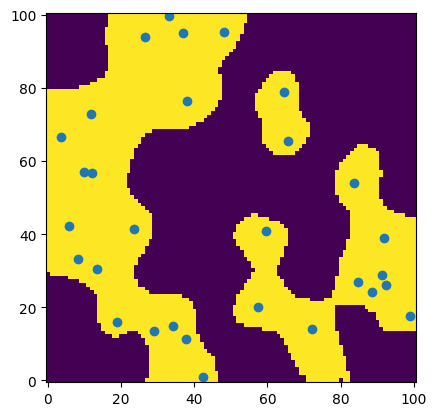

In [157]:
pred_img_th = np.where(pred_img > 0.999, 1, 0)

plt.imshow(pred_img_th)
plt.scatter(points[:,0],points[:,1])
plt.gca().invert_yaxis()

plt.show()

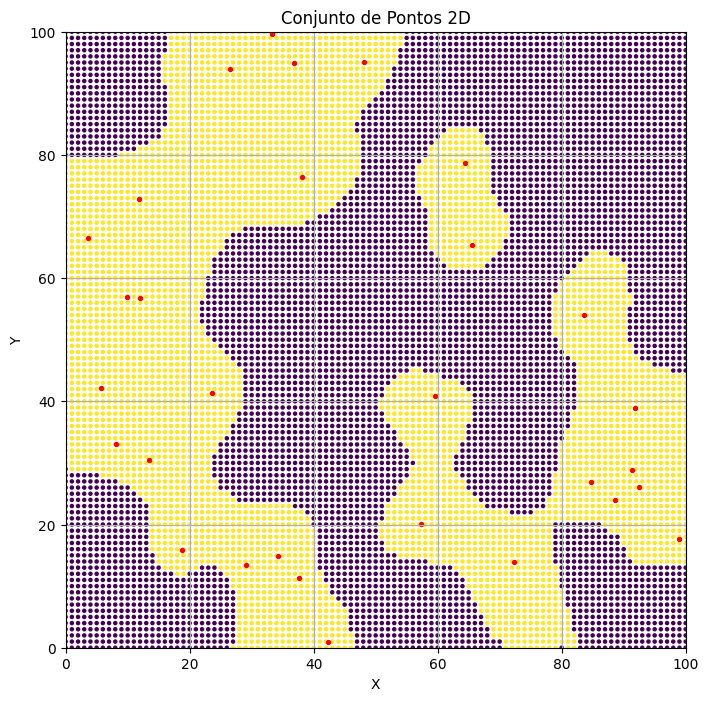

In [128]:
# Plotando os pontos (opcional)
plt.figure(figsize=(8, 8))
plt.scatter(test[:, 0], test[:, 1], s=5, c=pred)
plt.scatter(points[:, 0], points[:, 1], s=8, c='red')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Conjunto de Pontos 2D')
plt.grid(True)
plt.show()

In [92]:
prob

array([[0.72835488, 0.27164512],
       [0.73961784, 0.26038216],
       [0.75129715, 0.24870285],
       ...,
       [0.94270441, 0.05729559],
       [0.93068312, 0.06931688],
       [0.91787526, 0.08212474]])

(array([2528., 1208.,  882.,  571.,  464.,  482.,  514.,  598.,  805.,
        2149.]),
 array([3.41682955e-09, 9.99999629e-02, 1.99999922e-01, 2.99999882e-01,
        3.99999842e-01, 4.99999801e-01, 5.99999761e-01, 6.99999720e-01,
        7.99999680e-01, 8.99999639e-01, 9.99999599e-01]),
 <BarContainer object of 10 artists>)

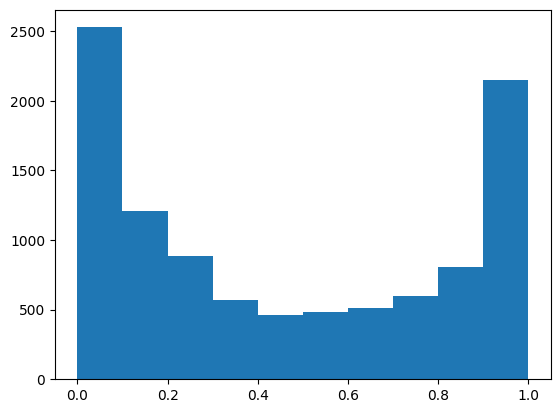

In [164]:
pred_img = np.array(prob[:,1]).reshape((xx.shape[0],yy.shape[0]))
pred_img = pred_img


plt.hist(pred_img.ravel())

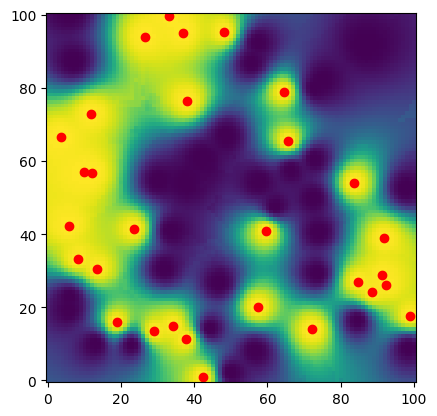

In [165]:
plt.imshow(pred_img)
plt.scatter(points[:,0],points[:,1],c='red')
plt.gca().invert_yaxis()

plt.show()

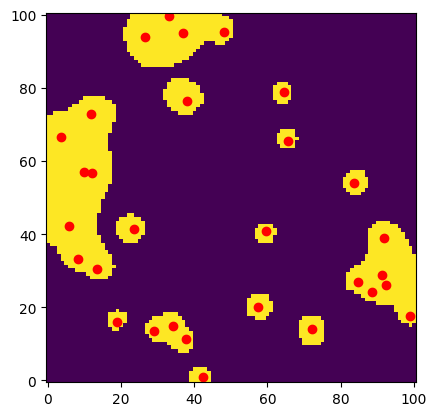

In [166]:
pred_img_th = np.where(pred_img > 0.92, 1, 0)

plt.imshow(pred_img_th)
plt.scatter(points[:,0],points[:,1],c='red')

plt.gca().invert_yaxis()

plt.show()


In [96]:
qtd_samples = samples.shape[0]
input_points = samples.copy()
dist_matrix = np.zeros((qtd_samples,qtd_samples))

qtd_diff_samples = 50
th_same_cluster = 0.9

print(dist_matrix.shape) 

for i in range(qtd_samples):
    for j in range(qtd_samples):
        if i == j:
            dist_matrix[i,i] = 1
            continue
        if i > j:
            continue
        diff = (input_points[i] - input_points[j])/(qtd_diff_samples-1)
        test_samples = np.zeros((qtd_diff_samples,2))
        for k in range(qtd_diff_samples):
            test_samples[k] = (0.999*input_points[i] - diff*k)
        pred, prob = model.predict(test_samples,3)
        if len(pred[prob[:,1] < th_same_cluster]) > 0:
            dist_matrix[i,j] = 0
            dist_matrix[j,i] = 0
            if i == 14 and j == 17:
                print(test_samples)
                print(input_points[i],input_points[j])
                print(i,j,len(pred[prob[:,1] < th_same_cluster]),prob)
        else:
            dist_matrix[i,j] = 1
            dist_matrix[j,i] = 1





(30, 30)
[[83.56906038 53.93983755]
 [83.72629996 53.42540213]
 [83.88353953 52.91096671]
 [84.04077911 52.39653128]
 [84.19801868 51.88209586]
 [84.35525826 51.36766044]
 [84.51249783 50.85322502]
 [84.66973741 50.33878959]
 [84.82697698 49.82435417]
 [84.98421655 49.30991875]
 [85.14145613 48.79548332]
 [85.2986957  48.2810479 ]
 [85.45593528 47.76661248]
 [85.61317485 47.25217706]
 [85.77041443 46.73774163]
 [85.927654   46.22330621]
 [86.08489358 45.70887079]
 [86.24213315 45.19443537]
 [86.39937273 44.67999994]
 [86.5566123  44.16556452]
 [86.71385188 43.6511291 ]
 [86.87109145 43.13669368]
 [87.02833102 42.62225825]
 [87.1855706  42.10782283]
 [87.34281017 41.59338741]
 [87.50004975 41.07895198]
 [87.65728932 40.56451656]
 [87.8145289  40.05008114]
 [87.97176847 39.53564572]
 [88.12900805 39.02121029]
 [88.28624762 38.50677487]
 [88.4434872  37.99233945]
 [88.60072677 37.47790403]
 [88.75796635 36.9634686 ]
 [88.91520592 36.44903318]
 [89.07244549 35.93459776]
 [89.22968507 35.42

In [97]:
print("Matriz de Adjacência:")
print(dist_matrix - np.identity(dist_matrix.shape[0]))


Matriz de Adjacência:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 1. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.

In [98]:
import numpy as np

def expand_adjacency_matrix(dist_matrix):
    num_vertices = dist_matrix.shape[0]
    expanded_matrix = np.zeros((num_vertices, num_vertices))

    # Conectar cada vértice aos seus vizinhos e aos vizinhos dos vizinhos
    for i in range(num_vertices):
        for j in range(num_vertices):
            if dist_matrix[i, j] != 0:
                expanded_matrix[i, j] = 1  # Conectar vértice aos vizinhos
                for k in range(num_vertices):
                    if dist_matrix[j, k] != 0 and k != i:
                        expanded_matrix[i, k] = 1  # Conectar vértice aos vizinhos dos vizinhos
            

    return expanded_matrix

# Expandir a matriz de adjacência
expanded_matrix = expand_adjacency_matrix(dist_matrix)

print("Matriz de Adjacência:")
print(dist_matrix)

for i in range(10):
    expanded_matrix = expand_adjacency_matrix(expanded_matrix)
    
print("Matriz de Adjacência Expandida:")
print(expanded_matrix)


Matriz de Adjacência:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 1. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.

In [99]:
from collections import deque

def label_connected_components(adjacency_matrix):
    num_vertices = len(adjacency_matrix)
    visited = [False] * num_vertices
    labels = [-1] * num_vertices  # Inicialmente, todos os vértices têm rótulo -1
    current_label = 0

    for vertex in range(num_vertices):
        if not visited[vertex]:
            # Começar uma nova busca em largura a partir do vértice não visitado
            bfs_queue = deque([vertex])
            visited[vertex] = True

            while bfs_queue:
                current_vertex = bfs_queue.popleft()
                labels[current_vertex] = current_label

                # Encontrar vizinhos não visitados e adicioná-los à fila
                for neighbor in range(num_vertices):
                    if adjacency_matrix[current_vertex][neighbor] == 1 and not visited[neighbor]:
                        bfs_queue.append(neighbor)
                        visited[neighbor] = True

            current_label += 1  # Atualizar o rótulo para o próximo conjunto de pontos interconectados

    return labels


# Obter os rótulos dos conjuntos de pontos interconectados
labels = label_connected_components(expanded_matrix)

print("Rótulos dos Conjuntos de Pontos Interconectados:")
print(labels)



Rótulos dos Conjuntos de Pontos Interconectados:
[0, 1, 2, 3, 4, 5, 5, 5, 1, 6, 7, 8, 6, 1, 9, 6, 5, 1, 6, 1, 10, 7, 7, 11, 6, 1, 5, 5, 5, 12]


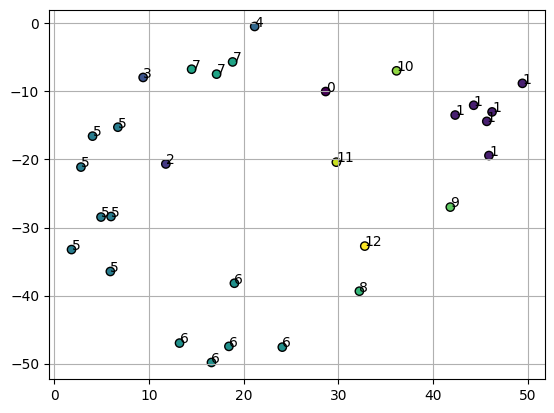

In [100]:
fig, ax = plt.subplots()

# Plot the generated points
ax.scatter(points[:, 0]/2, -points[:, 1]/2, c=labels, marker='o', edgecolors='black')
#ax.title(f'{N} Random 2D Points')
#ax.xlabel('X Coordinate')
#ax.ylabel('Y Coordinate')
ax.grid(True)

for i, txt in enumerate(range(N)):
    ax.annotate(labels[i], (points[i,0]/2, -points[i,1]/2))

plt.show()

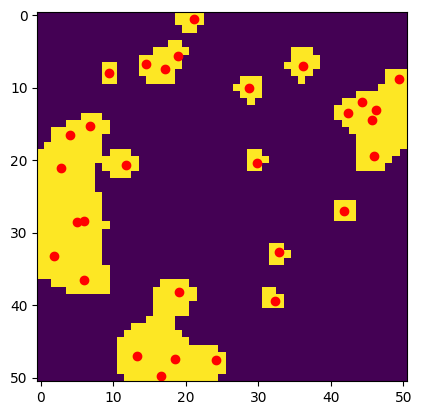

In [101]:
pred_img_th = np.where(pred_img > th_same_cluster, 1, 0)

plt.imshow(pred_img_th)
plt.scatter(points[:,0]/2,points[:,1]/2,c='red')
for i, txt in enumerate(range(N)):
    ax.annotate(txt, (points[i,0]/2, points[i,1]/2))

plt.show()
